# Первое задание

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [73]:
x = np.array([19.5, 15, 13.5, 23.3, 6.3, 2.5, 13, 1.8, 6.5, 1.8])
y = np.array([0, 38.5, 59, 97.4, 119.2, 129.5, 198.7, 248.7, 318, 438.5])

In [74]:
np.corrcoef(x, y)

array([[ 1.        , -0.67705142],
       [-0.67705142,  1.        ]])

Коэффициент корреляции равен -0.677051

In [75]:
# тут немного упростил себе жизнь, используя функцию linregress, но во второй задаче делаю всё через формулы
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

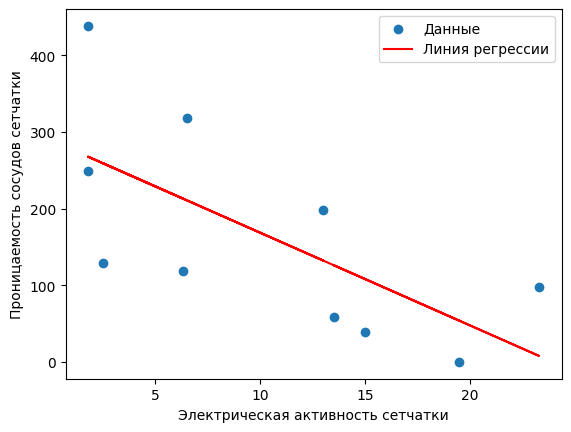

In [76]:
plt.scatter(x, y, label='Данные')
plt.plot(x, line, color='red', label='Линия регрессии')
plt.xlabel('Электрическая активность сетчатки')
plt.ylabel('Проницаемость сосудов сетчатки')
plt.legend()
plt.show()

In [77]:
f'Уравнение регрессии: y = {slope} * x + {intercept}'

'Уравнение регрессии: y = -12.09182361880855 * x + 289.53761974610427'

Коэффициент корреляции равен -0.677051, что говорит о довольно высокой обратной зависимостью между электрической активностью сетчатки и проницаемостью сосудов сетчатки

In [78]:
p_value

0.03151397425563342

Так как prob p-value меньше выбранного уровня значимости (0.05 в нашем случае), то нулевая гипотеза отвергается, принимается гипотеза H1. Она утверждает, что корреляция между переменными значима

# Второе задание

In [79]:
from scipy.stats import t

In [80]:
x = np.array([52, 110, 170, 141, 150, 160, 200, 230, 240, 260, 270, 300])
y = np.array([100, 90, 130, 31, 60, 39, 58, 70, 80, 150, 120, 130])

In [81]:
# вычисление коэффициентов регрессии
n = len(x)
M_x_y = x * y
Sq_x = x ** 2
Sq_y = y ** 2
S_x = np.sum(x)
S_y = np.sum(y)
S_xx = np.sum(Sq_x)
S_yy = np.sum(Sq_y)
S_xy = np.sum(x * y)
x_bar = S_x / n
y_bar = S_y / n
Diff_x = x - x_bar
Diff_y = y * y_bar
S_diff_x = np.sum(Diff_x)
S_diff_x_sq = np.sum(Diff_x ** 2)
A_x_y = S_xy / n
A_sq_x = np.sum(Sq_x) / n
A_sq_y = np.sum(Sq_y) / n

In [82]:
disp_x = A_sq_x - x_bar ** 2
disp_y = A_sq_y - y_bar ** 2
disp_x, disp_y

(4862.020833333336, 1355.4722222222217)

In [83]:
slope = (A_x_y - x_bar * y_bar) / disp_x
intercept = y_bar - slope * x_bar

In [84]:
print(f"Наклон (slope): {slope}")
print(f"Пересечение с осью y (intercept): {intercept}")

Наклон (slope): 0.2198417153361291
Пересечение с осью y (intercept): 46.34178032396811


In [85]:
# линия регрессии
line = slope * x + intercept
line

array([ 57.77354952,  70.52436901,  83.71487193,  77.33946219,
        79.31803762,  81.51645478,  90.31012339,  96.90537485,
        99.103792  , 103.50062631, 105.69904346, 112.29429492])

In [86]:
correlation = np.corrcoef(x, y)[0, 1]
f'Коэффициент корреляции равен {correlation}'

'Коэффициент корреляции равен 0.41636402741536743'

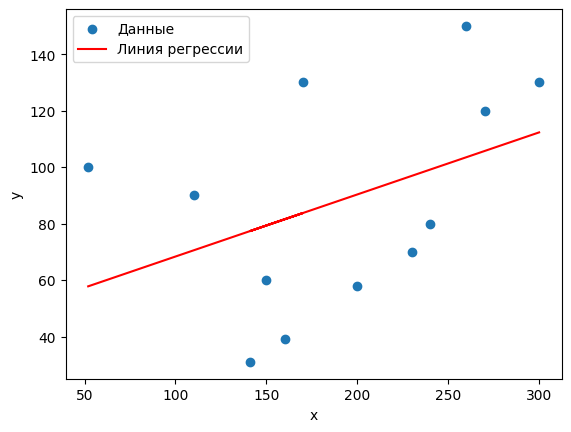

In [87]:
plt.scatter(x, y, label='Данные')
plt.plot(x, line, color='red', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [88]:
f"Уравнение регрессии: y = {intercept:.2f} + {slope:.2f} * x"

'Уравнение регрессии: y = 46.34 + 0.22 * x'

In [89]:
y_pred = intercept + slope * x
y_pred

array([ 57.77354952,  70.52436901,  83.71487193,  77.33946219,
        79.31803762,  81.51645478,  90.31012339,  96.90537485,
        99.103792  , 103.50062631, 105.69904346, 112.29429492])

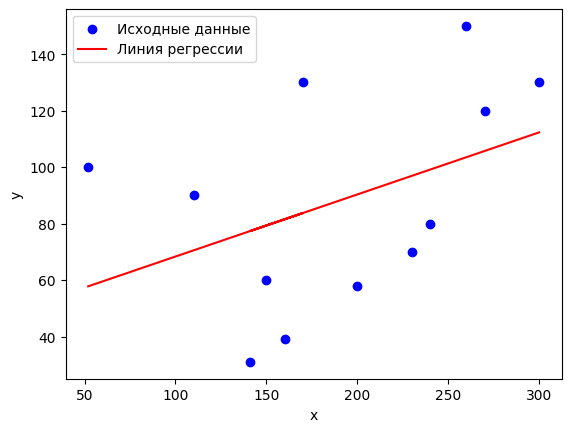

In [90]:
# построение точечной диаграммы
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x, y_pred, color='red', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [91]:
# коэффициент парной корреляции
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
correlation_coefficient = numerator / denominator
correlation_coefficient

0.4163640274153675

Коэффициент находится в интервале от 0,3 до 0,5, связь умеренная, прямая

In [92]:
# вычисление t-статистики
t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation ** 2))

In [93]:
# вычисление степеней свободы
df = n - 2

In [94]:
# вычисление p-значения
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
f'p-value: {p_value}'

'p-value: 0.17819111920353015'

Так как prob p-value больше выбранного уровня значимости (0.05 в нашем случае), то нулевая гипотеза принимается. Она утверждает, что корреляция между переменными не значима

In [95]:
# стандартная ошибка остаточной компоненты
s_err = np.sqrt((1 / (n - 1)) * np.sum((y - y_pred) ** 2))
s_err

34.96214433941087

In [96]:
# средняя квадратичная (стандартная) ошибка оценивания коэффициента a
s_err_a = s_err * np.sqrt(S_xx / (n * np.sum(np.array([xi - x_bar for xi in x]) ** 2)))
s_err_a

29.328717865881387

In [97]:
# средняя квадратичная (стандартная) ошибка оценивания коэффициента b
s_err_b = s_err ** 2 / np.sqrt(np.sum(np.array([xi - x_bar for xi in x]) ** 2))
s_err_b

5.060542681713771

In [98]:
# t статистика для a
ta = intercept / s_err_a
ta

1.5800820389042072

In [99]:
# t статистика для b
tb = slope / s_err_b
tb

0.04344232015481765

Сравниваем полученное значение t-критерия Стьюдента с критическим при р=0,05 и f = 11 (f=N-1) (число степеней свободы)значением, указанным в таблице: tтабл = 2,20, можно сказать, что коэффициент а ненадёжен, коэффициент b ненадёжен при данном уровне значимости.
Так как рассчитанное значение критерия 𝑡𝑎 = 1,58 меньше критического, делаем вывод о том, что наблюдаемые различия статистически не значимы, коэффициент а ненадёжен. Значение критерия 𝑡𝑏 = 0,043 меньше табличного, значит различия сравниваемых величин статистически не значимы, коэффициент b ненадёжен при данном уровне значимости.

In [100]:
delta_a = 2.2 * ta
delta_b = 2.2 * tb
delta_a, delta_b

(3.476180485589256, 0.09557310434059885)

In [101]:
f'доверительный интервал для а: {intercept - delta_a} < a < {intercept + delta_a}'

'доверительный интервал для а: 42.865599838378856 < a < 49.81796080955736'

In [102]:
f'доверительный интервал для b: {slope - delta_b} < b < {slope + delta_b}'

'доверительный интервал для b: 0.12426861099553024 < b < 0.3154148196767279'

In [103]:
f'Таким образом, из-за ненадёжности, полученные оценки коэффициента регрессии b и свободного члена а не являются эффективными и состоятельными, а само уравнение у = {intercept} + {slope}х не может использоваться для моделирования и прогнозирования динамики. Это обусловлено большой ошибкой уравнения регрессии.'

'Таким образом, из-за ненадёжности, полученные оценки коэффициента регрессии b и свободного члена а не являются эффективными и состоятельными, а само уравнение у = 46.34178032396811 + 0.2198417153361291х не может использоваться для моделирования и прогнозирования динамики. Это обусловлено большой ошибкой уравнения регрессии.'